In [1]:
import cv2
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
def convertToRGB(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [3]:
def detect_faces(f_cascade, colored_img, scaleFactor):
    #just making a copy of image passed, so that passed image is not changed 
    img_copy = colored_img.copy()

    #convert the test image to gray image as opencv face detector expects gray images
    gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY) 

    #let's detect multiscale (some images may be closer to camera than others) images
    faces = f_cascade.detectMultiScale(gray, scaleFactor=scaleFactor, 
    minNeighbors=5)   
    faces_found = len(faces)

    #go over list of faces and draw them as rectangles on original colored img
    for (x, y, w, h) in faces:
        cv2.rectangle(img_copy, (x, y), (x+w, y+h), (0, 255, 0), 2)

    return img_copy, faces_found

# 1. Body Detection

In [4]:
test1 = cv2.imread('body.jpg')
gray_img = cv2.cvtColor(test1, cv2.COLOR_BGR2GRAY)

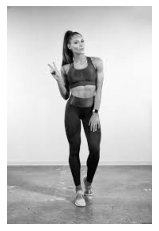

In [5]:
plt.imshow(gray_img, cmap = 'gray')
plt.axis('off');

In [6]:
haar_face_cascade = cv2.CascadeClassifier('haarcascade_fullbody.xml')

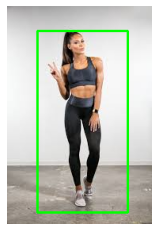

In [7]:
faces_detected_img, faces_found = detect_faces(haar_face_cascade, test1, 1.2)
plt.imshow(convertToRGB(faces_detected_img))
plt.axis('off');

In [8]:
plt.imsave('body_output.png', convertToRGB(faces_detected_img))

# 2. Eye with glasses detection

In [9]:
import mtcnn
from mtcnn.mtcnn import MTCNN
from skimage import io

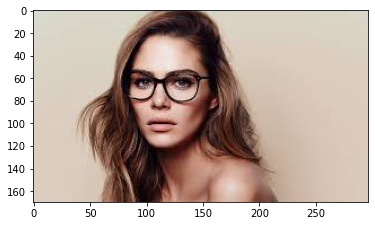

In [10]:
image = io.imread('face_glasses_1.jpg')
plt.imshow(image);

In [11]:
detector = MTCNN()
result = detector.detect_faces(image)

In [12]:
result

[{'box': [81, 22, 77, 104],
  'confidence': 0.9998899698257446,
  'keypoints': {'left_eye': (98, 64),
   'right_eye': (131, 63),
   'nose': (111, 82),
   'mouth_left': (101, 102),
   'mouth_right': (126, 102)}}]

In [13]:
k = 12
for person in result:
    bounding_box = person['box']
    keypoints = person['keypoints']
    cv2.rectangle(image,
                  (bounding_box[0], bounding_box[1]),
                  (bounding_box[0] + bounding_box[2],
                   bounding_box[1] + bounding_box[3]),
                  (0, 255, 0), 2)
    
    cv2.rectangle(image, (keypoints['left_eye'][0] - k, keypoints['left_eye'][1] - k), 
                         (keypoints['left_eye'][0] + k, keypoints['left_eye'][1] + k), (27,6,255), 2) # hinh, vi tri, ban kinh, mau sac, do dam
    cv2.rectangle(image, (keypoints['right_eye'][0] - k, keypoints['right_eye'][1] - k),
                         (keypoints['right_eye'][0] + k, keypoints['right_eye'][1] + k), (27,6,255), 2)

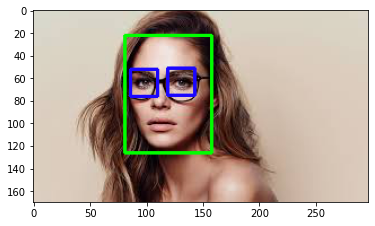

In [14]:
plt.imshow(image)
plt.show()

In [15]:
plt.imsave('face_glasses_1_output.png', image)